# Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being.

### The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India. 
### The air quality is classified into one of the six buckets:Good,Moderate,Satisfactory,Poor,Very Poor,Severe. This dataset is to predict the air quality of states at daily level basis

# Data Set Description

City: Indian Cities

Date: Date from 2015-2020

PM2.5: Fine particulate matter

PM10: Particulate Matter

NO: Nitirc Oxide

NO2: Nitrogen Dioxide

NH3:Ammonia

CO:Carbon Monoxide

SO2:Sulfur dioxide

O3:Ozone

Benzene:organic chemical compound with the molecular formula C₆H₆

Toluene: Substituted aromatic hydrocarbon

Xylene:Dimethylbenzene 

AQI: An index for reporting air quality on a daily basis.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load dataset

In [2]:
data = pd.read_csv("city_day.csv")
data

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [3]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### Pre-processing

In [5]:
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 16)


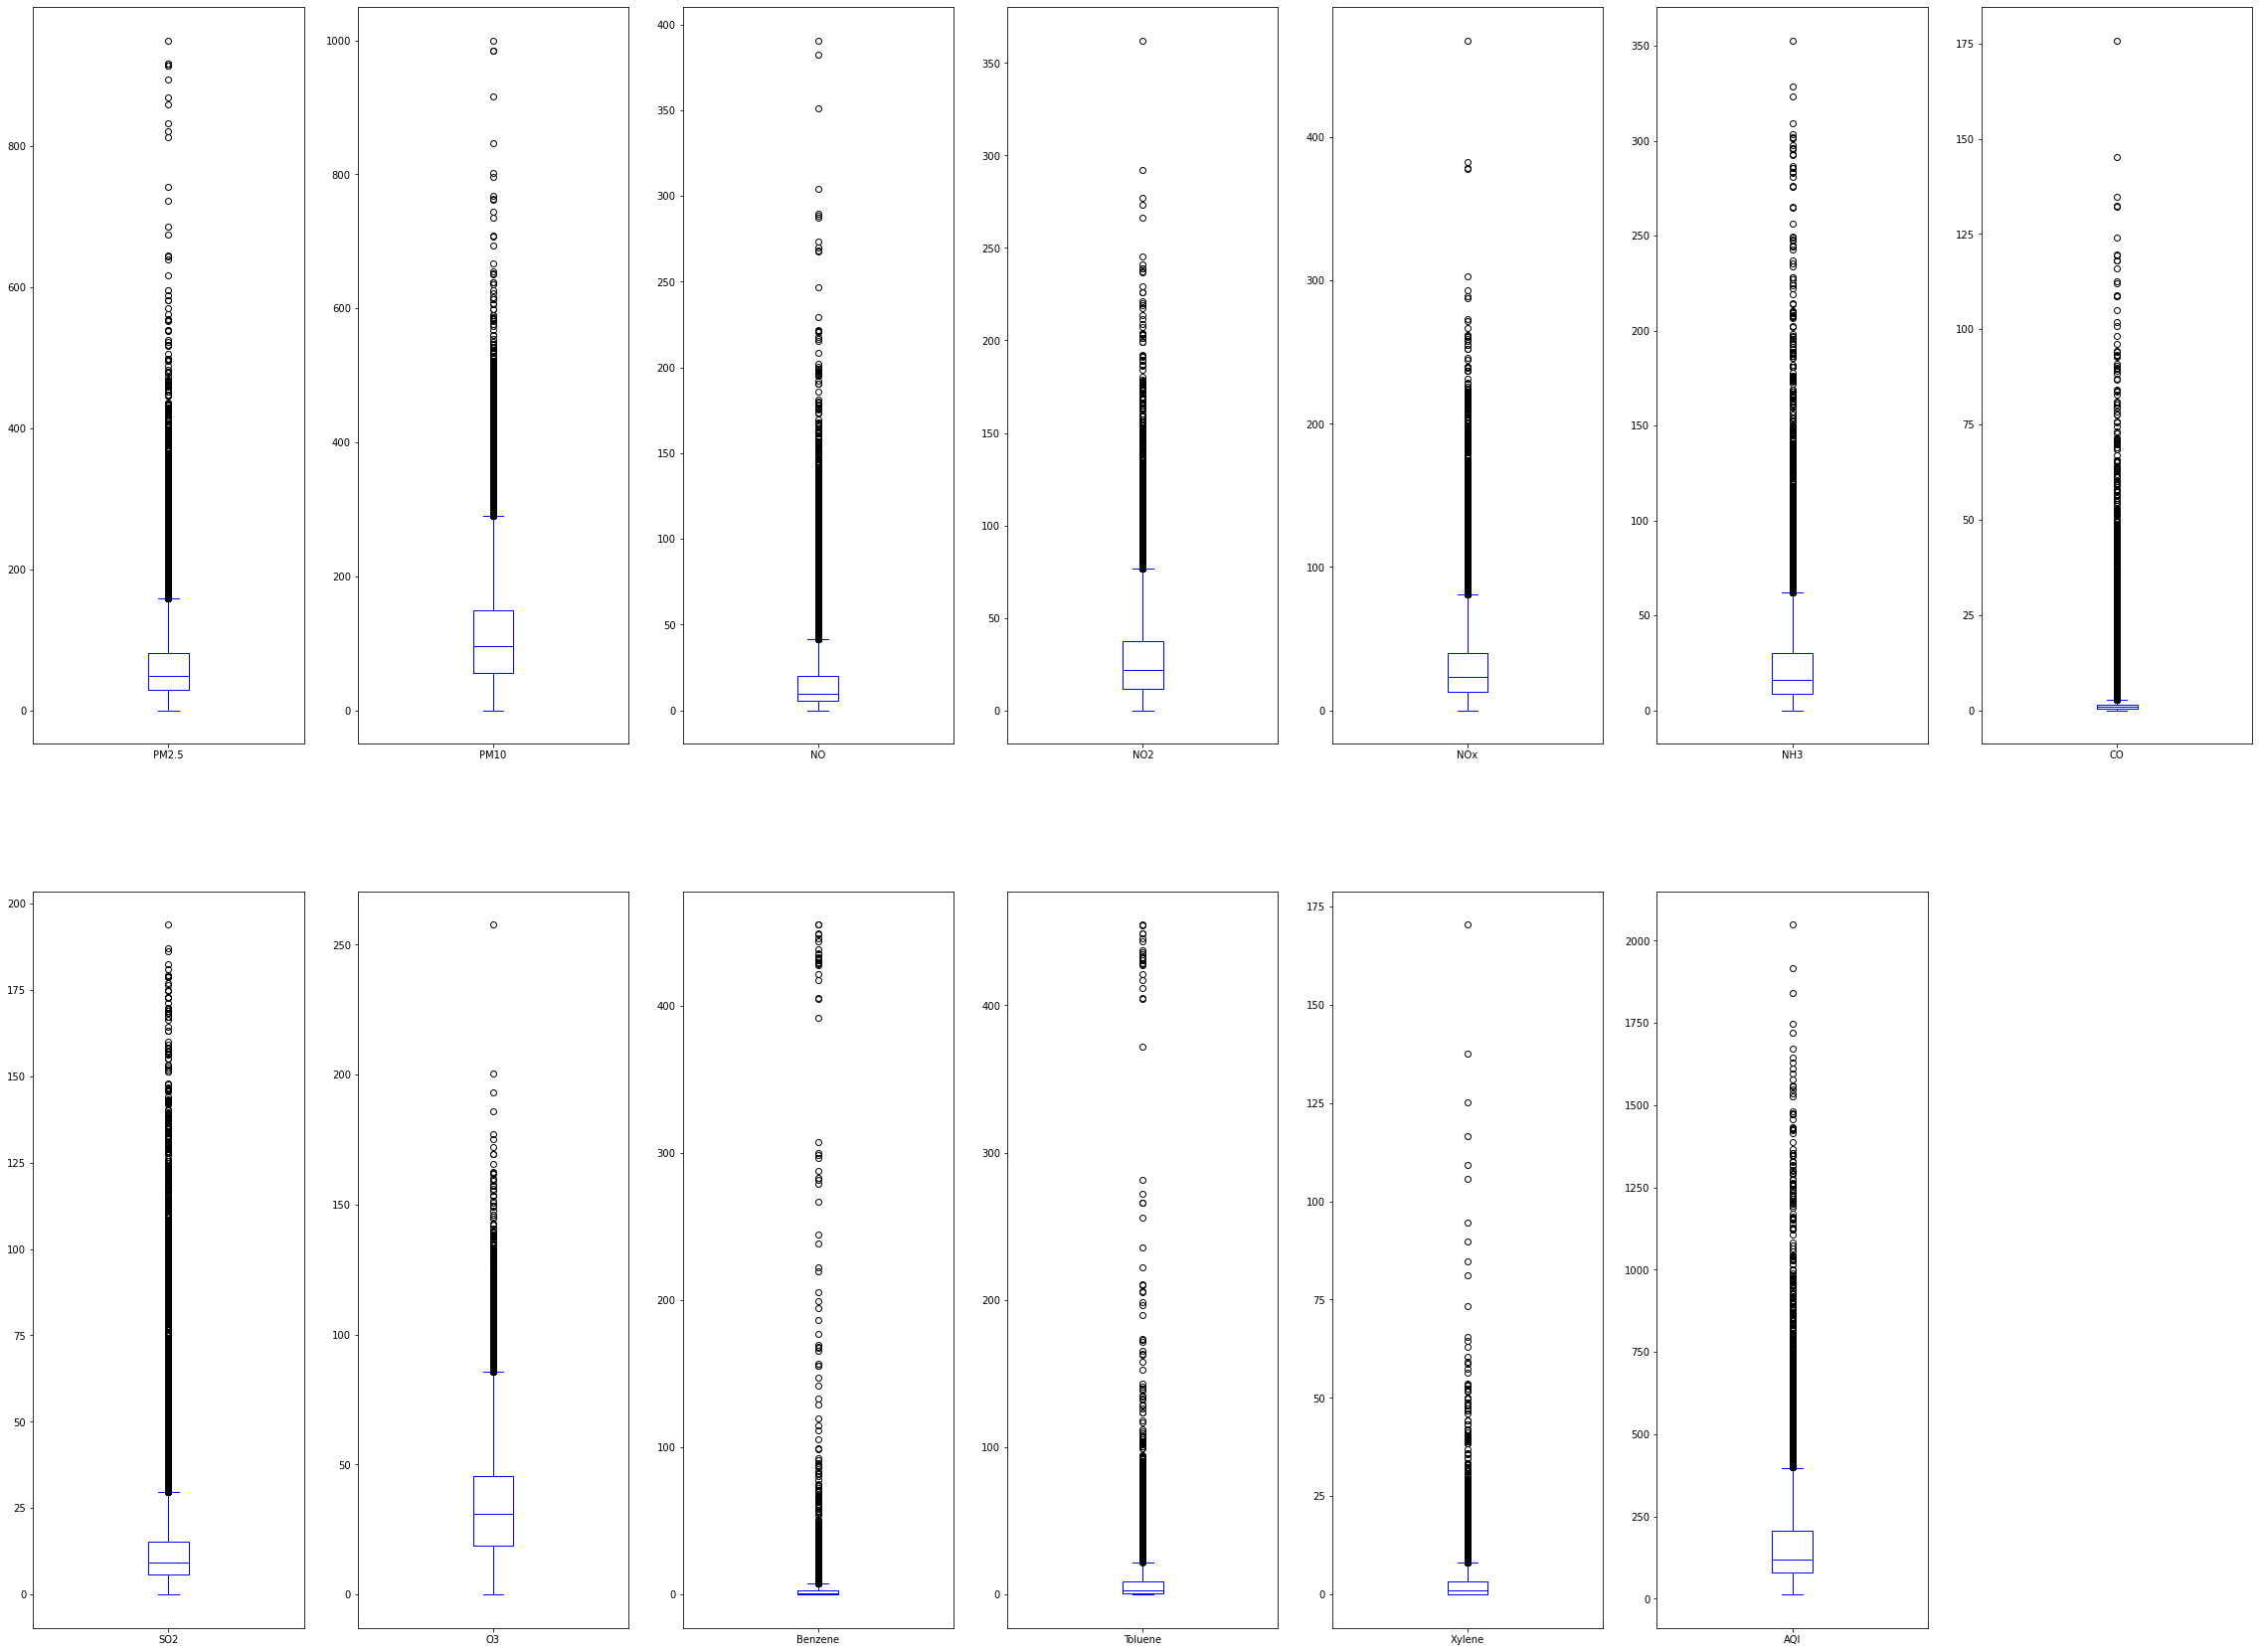

In [6]:
data.isna().sum()
data['Xylene']
data.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(40, 30), 
color='blue');

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'NO'}>,
        <AxesSubplot:title={'center':'NO2'}>],
       [<AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'NH3'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'SO2'}>],
       [<AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'Benzene'}>,
        <AxesSubplot:title={'center':'Toluene'}>,
        <AxesSubplot:title={'center':'Xylene'}>],
       [<AxesSubplot:title={'center':'AQI'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

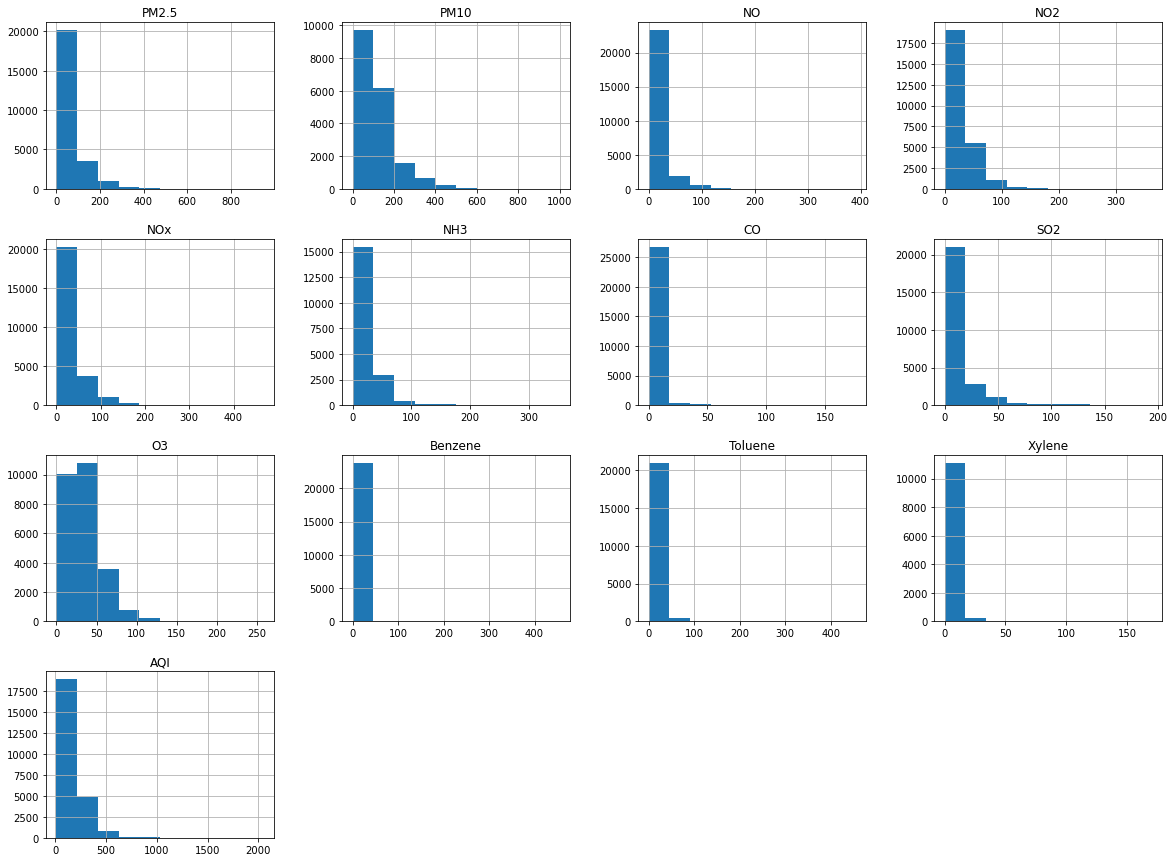

In [7]:
freqgraph = data.select_dtypes(include = ['float'])
freqgraph.hist(figsize = (20,15))

#### In a skewed distribution, the outliers in the tail pull the mean away from the center towards the longer tail. 
#### The median better represents the central tendency for the distribution.

#### a. Checking Missing values

In [8]:
data=data.fillna(data.median())

In [9]:
data.isna().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [10]:
data['AQI_Bucket']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
29526            Good
29527    Satisfactory
29528    Satisfactory
29529    Satisfactory
29530            Good
Name: AQI_Bucket, Length: 29531, dtype: object

In [11]:
data = data.dropna()

In [12]:
data['AQI_Bucket']

28               Poor
29          Very Poor
30             Severe
31             Severe
32             Severe
             ...     
29526            Good
29527    Satisfactory
29528    Satisfactory
29529    Satisfactory
29530            Good
Name: AQI_Bucket, Length: 24850, dtype: object

In [13]:
len(data)

24850

#### b. Check for outliers

In [14]:
qv1 = data['PM2.5'].quantile(0.25)
qv2 = data['PM2.5'].quantile(0.50)
qv3 = data['PM2.5'].quantile(0.75)
qv_limit = 1.5*(qv3-qv1)
iqr = qv3-qv1
outmask = (data['PM2.5'] > qv3 + qv_limit) | (data['PM2.5'] < qv1 - qv_limit)
outdata = data['PM2.5'][outmask]


Text(0, 0.5, 'PM2.5')

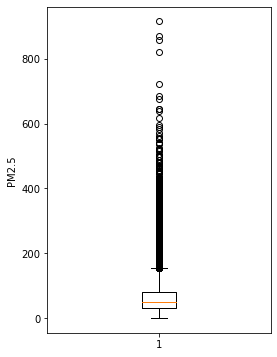

In [15]:
fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['PM2.5'])
ax.set_ylabel('PM2.5')

<Figure size 1152x360 with 0 Axes>

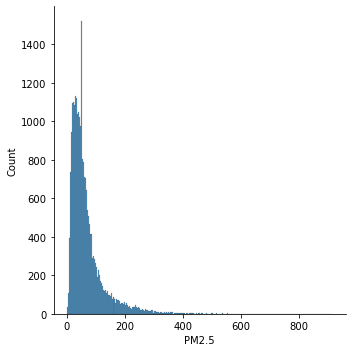

In [16]:
plt.figure(figsize=(16,5))
sns.displot(data['PM2.5'])
plt.show()

In [17]:
percentile25 = data['PM2.5'].quantile(0.25)
percentile75 = data['PM2.5'].quantile(0.75)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [18]:
data['PM2.5'] = data['PM2.5'].clip(upper_limit,lower_limit)
# Clipping the outliers of the column - PM2.5

Text(0, 0.5, 'PM2.5')

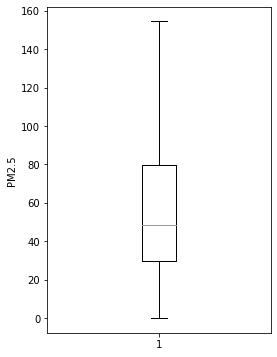

In [19]:
fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['PM2.5'])
ax.set_ylabel('PM2.5')

In [20]:
for each_feature in data.columns[2:-3]:
    Q1 = data[each_feature].quantile(0.25) # 25th percentile of the data of the given feature
    Q2 = data[each_feature].quantile(0.50)
    Q3 = data[each_feature].quantile(0.75) # 75th percentile of the data of the given feature
    IQR = Q3-Q1 #Interquartile Range
    outlier_step = IQR * 1.5 
    outmask = (data[each_feature] > Q3 + outlier_step) | (data[each_feature] < Q1 - outlier_step)
    outdata = data[each_feature][outmask]
    percentile25 = data[each_feature].quantile(0.25)
    percentile75 = data[each_feature].quantile(0.75)
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    data[each_feature] = data[each_feature].clip(upper_limit,lower_limit)
        

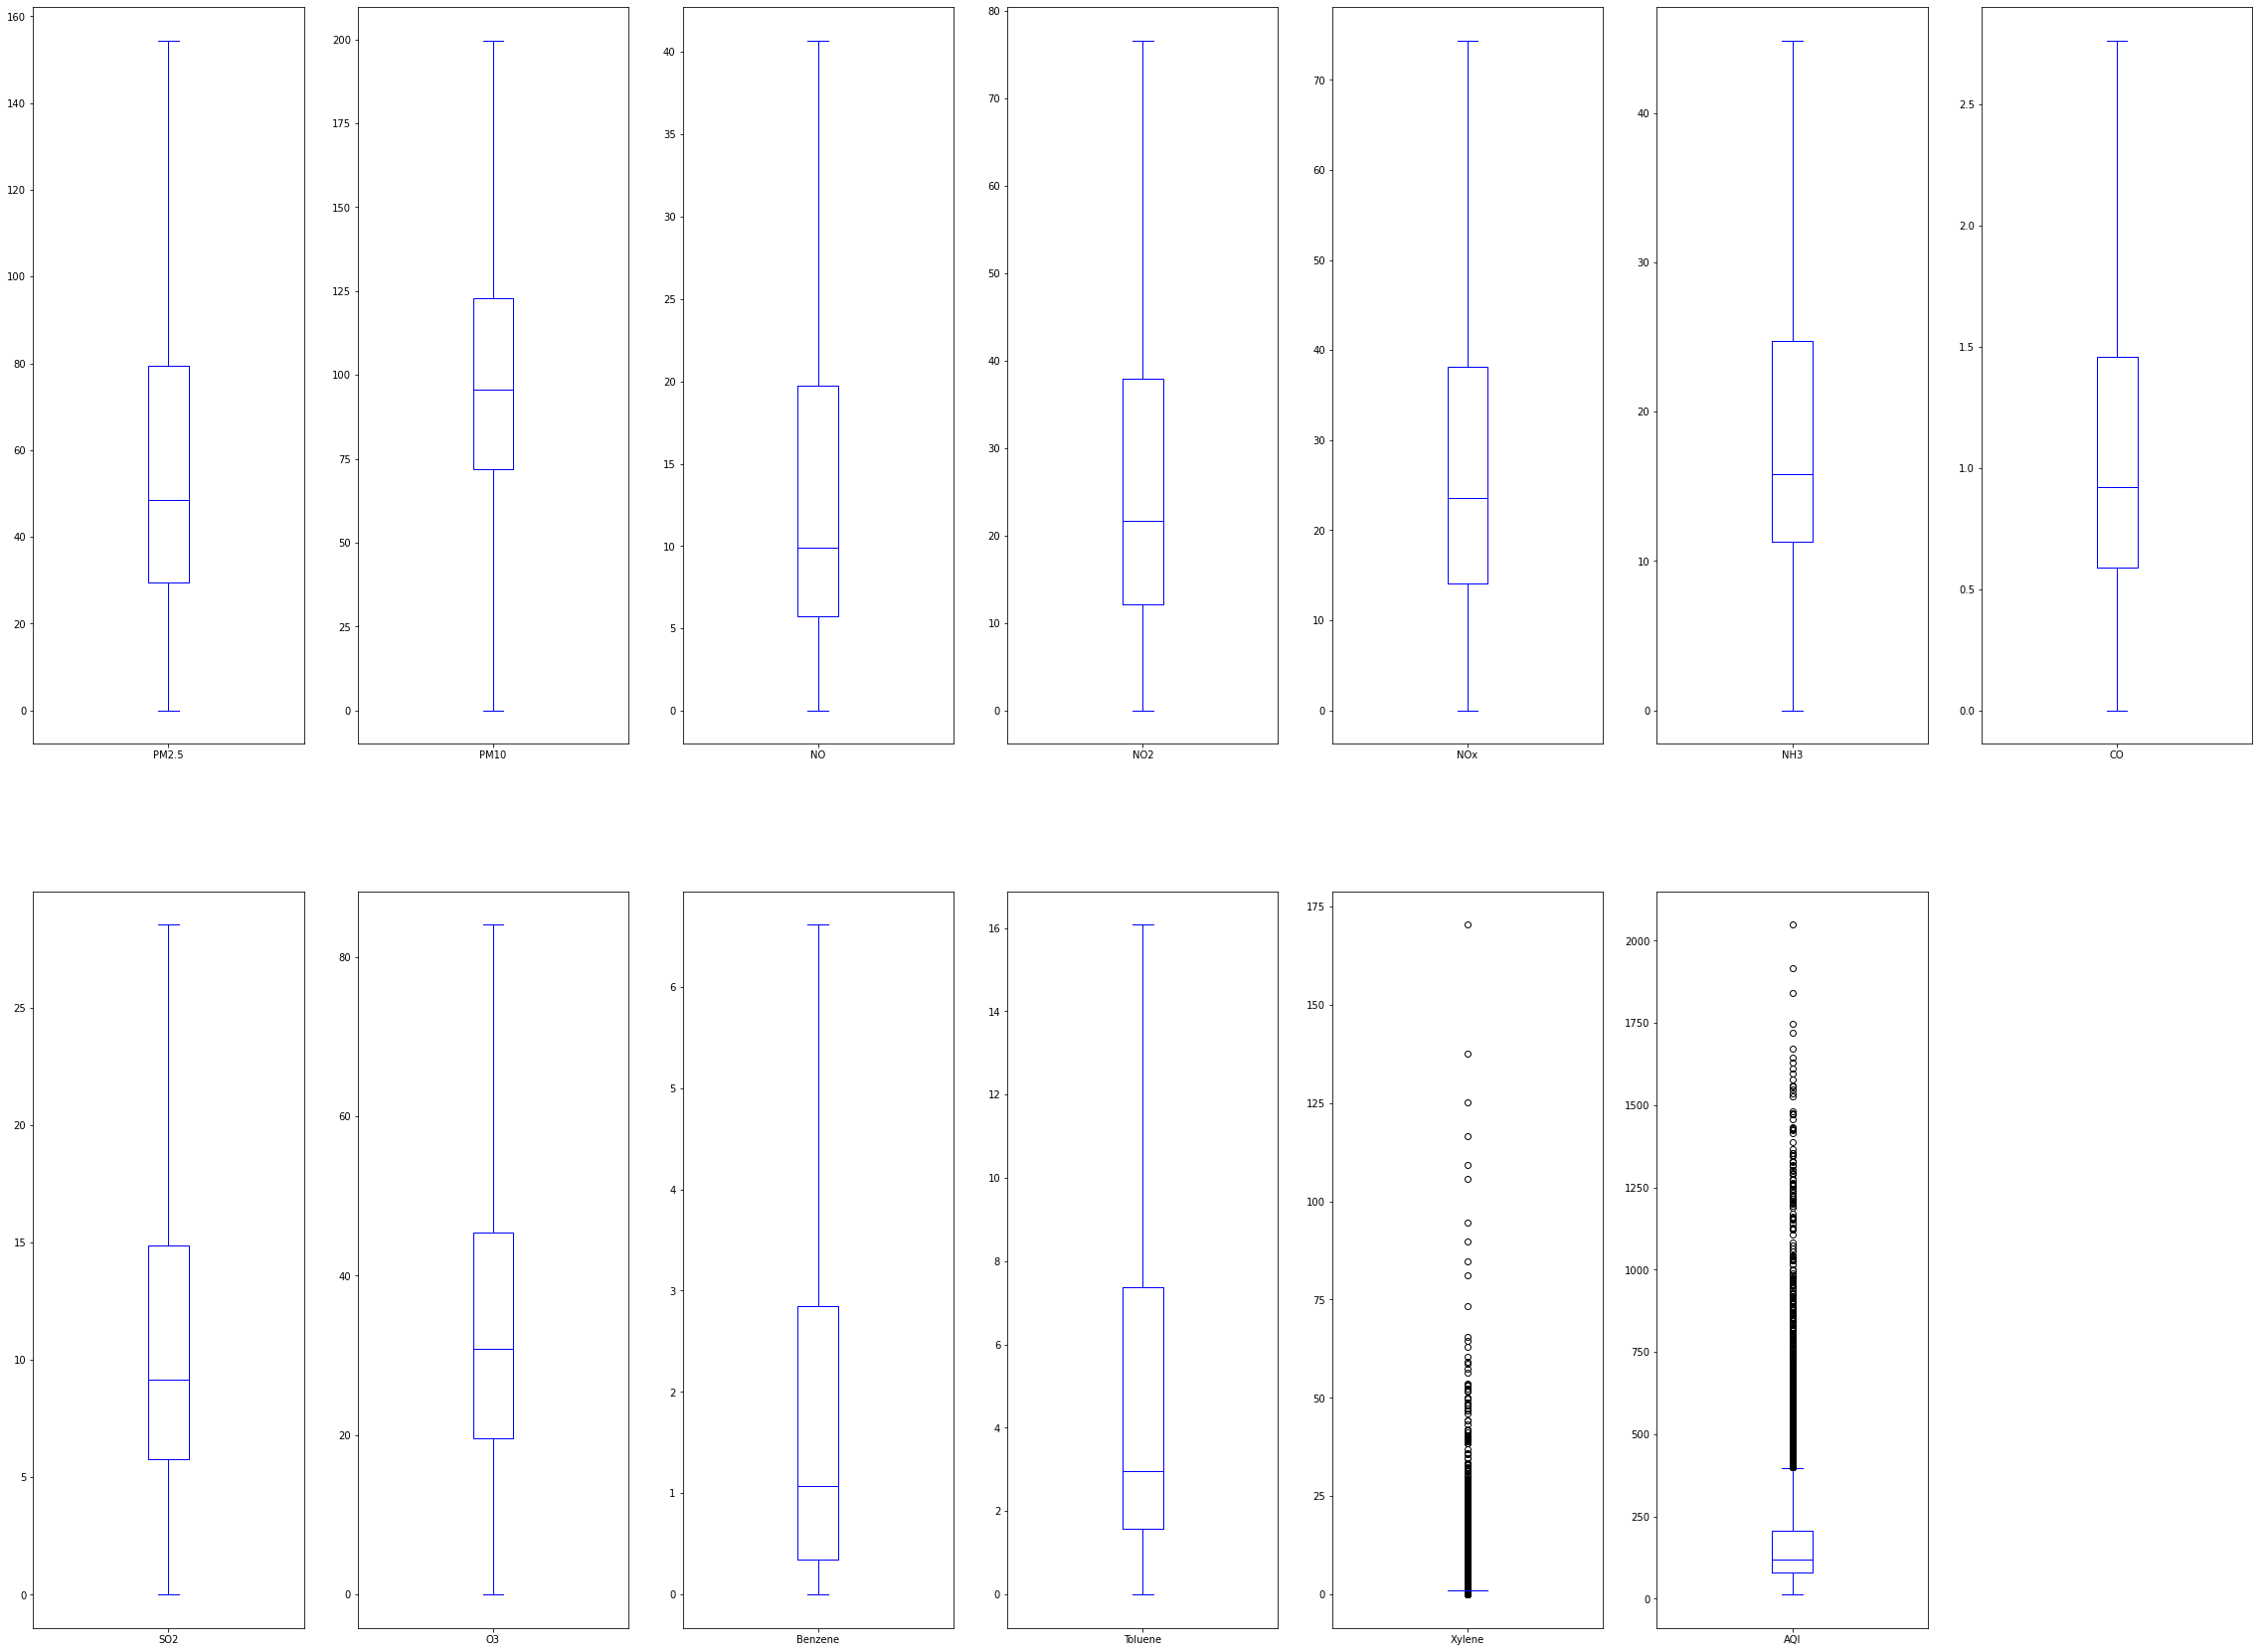

In [21]:
data.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(40, 30), 
color='blue');

In [22]:
Q1 = data['AQI'].quantile(0.25) # 25th percentile of the data of the given feature
Q2 = data['AQI'].quantile(0.50)
Q3 = data['AQI'].quantile(0.75) # 75th percentile of the data of the given feature
IQR = Q3-Q1 #Interquartile Range
outlier_step = IQR * 1.5 
outmask = (data['AQI'] > Q3 + outlier_step) | (data['AQI'] < Q1 - outlier_step)
outdata = data['AQI'][outmask]
percentile25 = data['AQI'].quantile(0.25)
percentile75 = data['AQI'].quantile(0.75)
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
data['AQI'] = data['AQI'].clip(upper_limit,lower_limit)
        

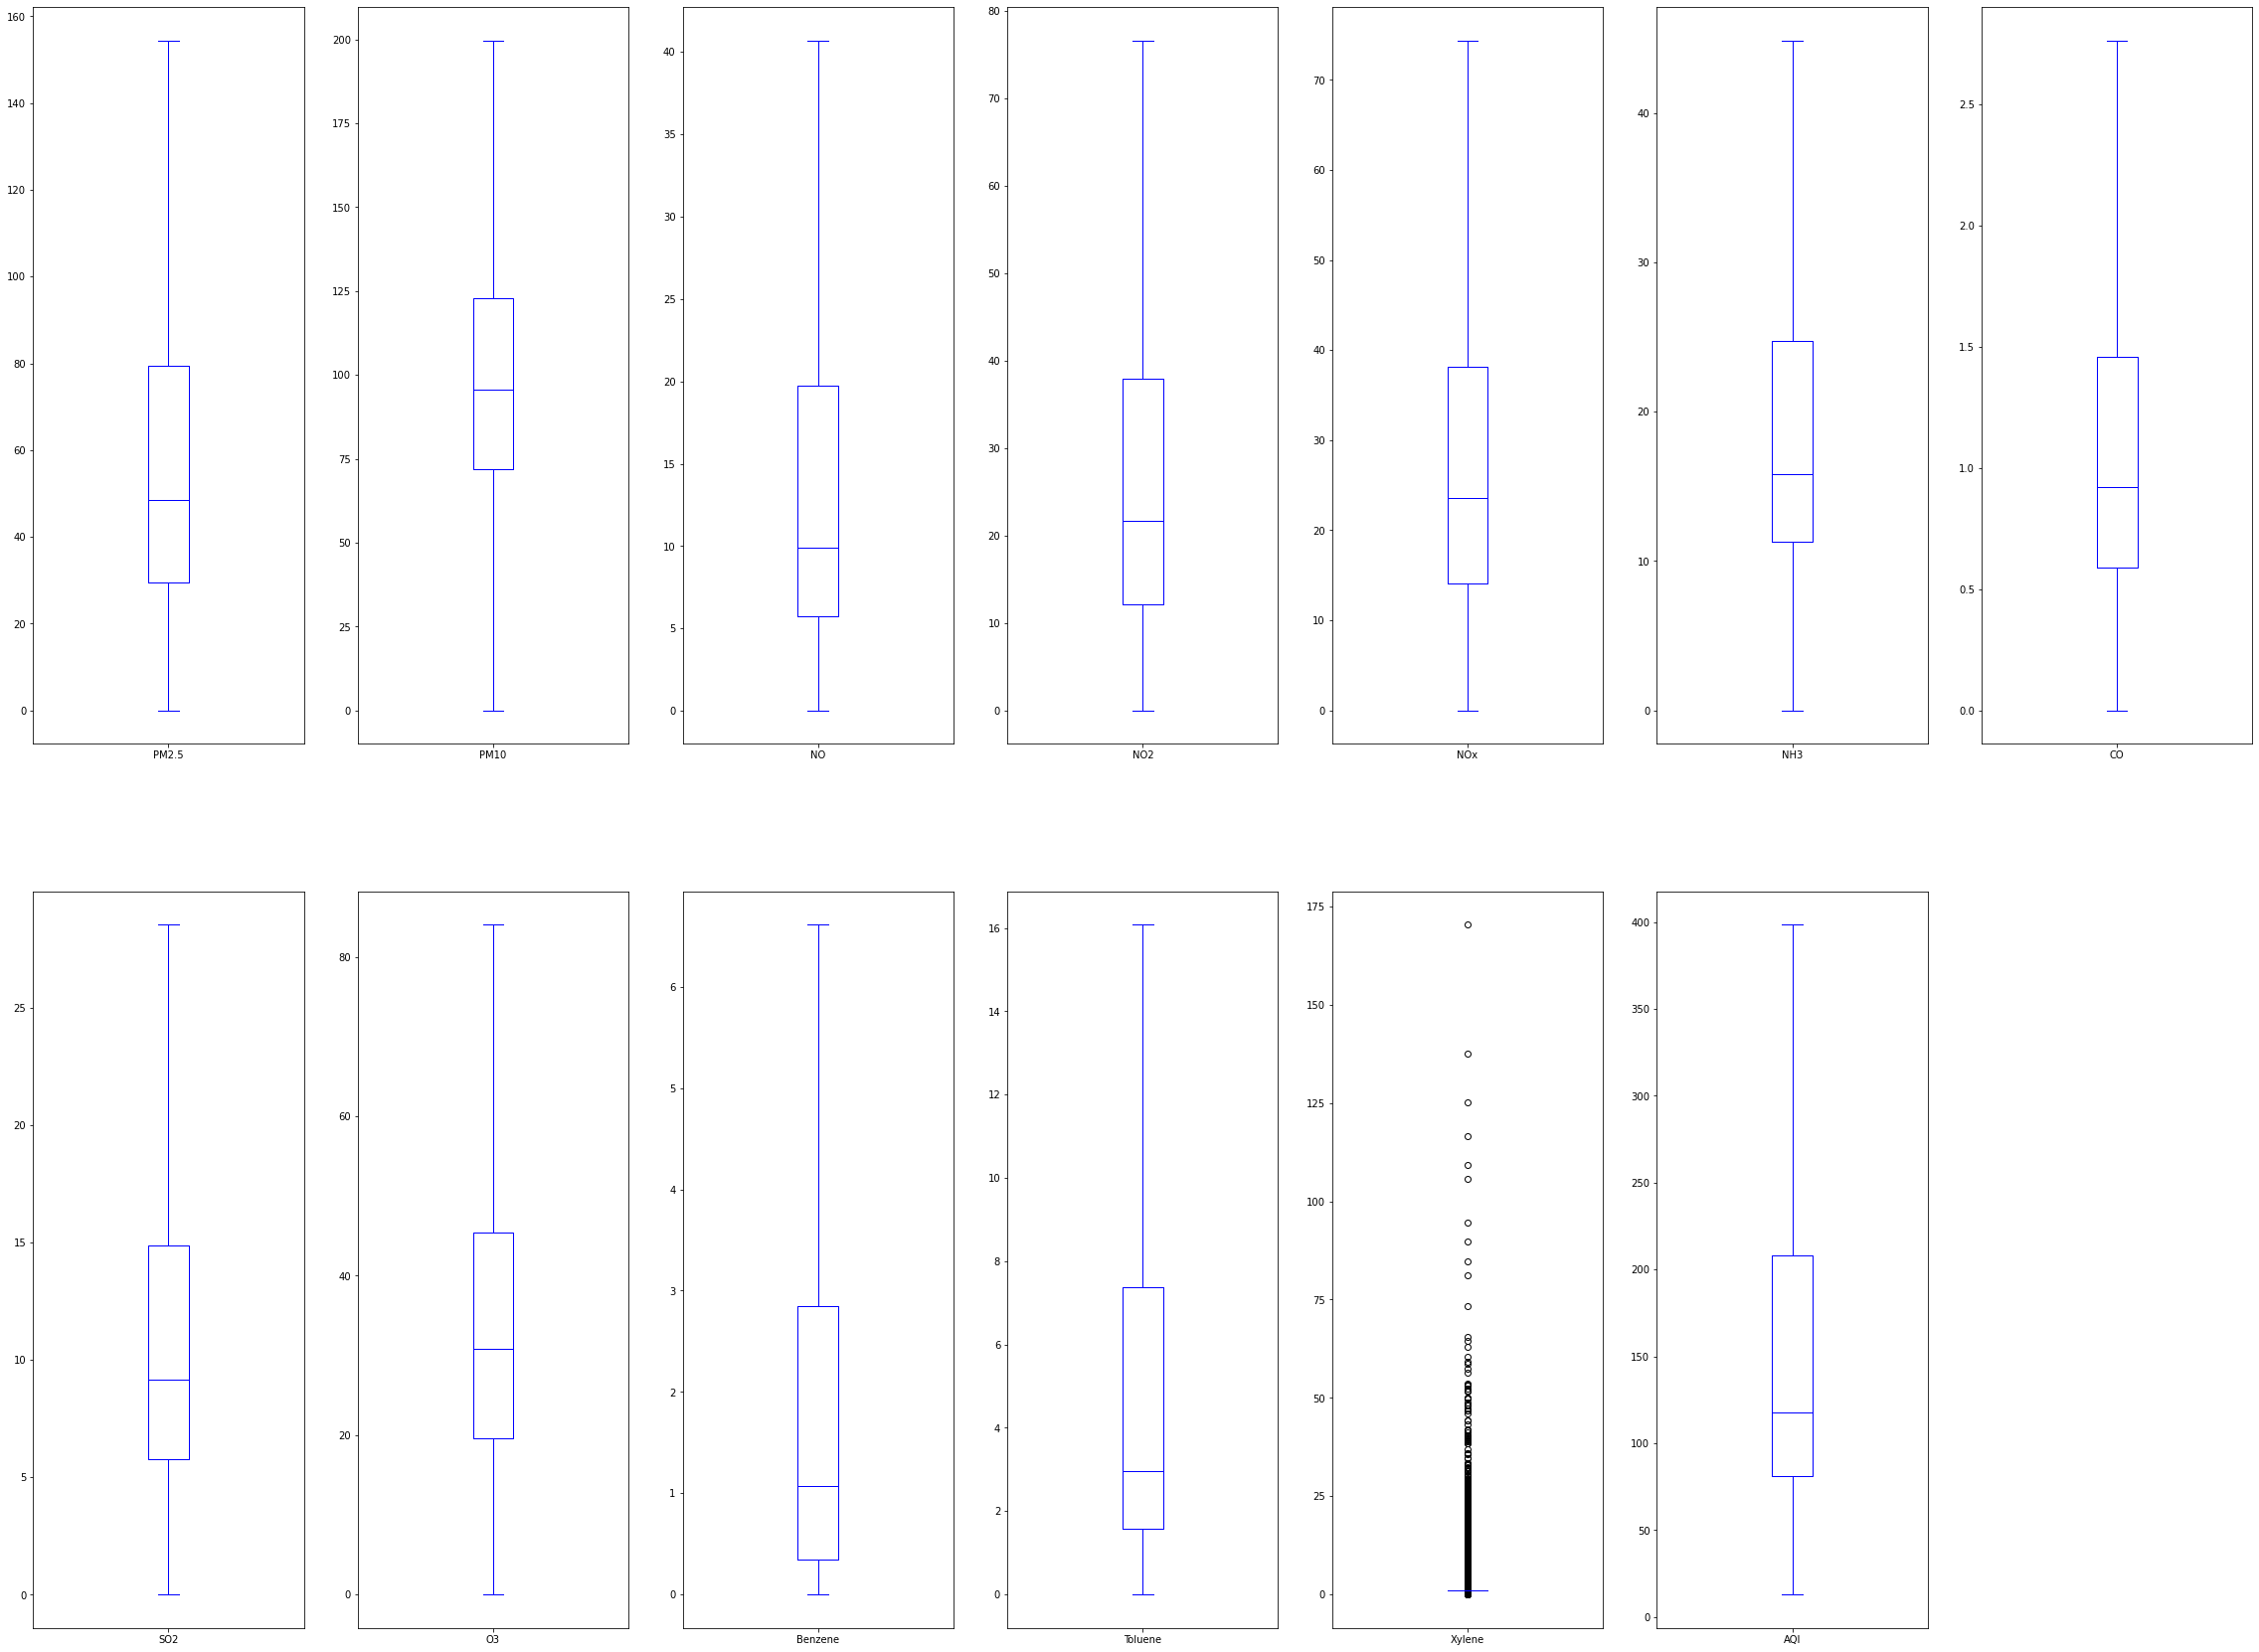

In [23]:
data.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(40, 30), 
color='blue');

We are not applying outlier correction to Xylene as the majority of the values have very less difference with each other

#### Correlation between variables (Pearson correlation)


Text(0.5, 1.0, 'Pearson Correlation')

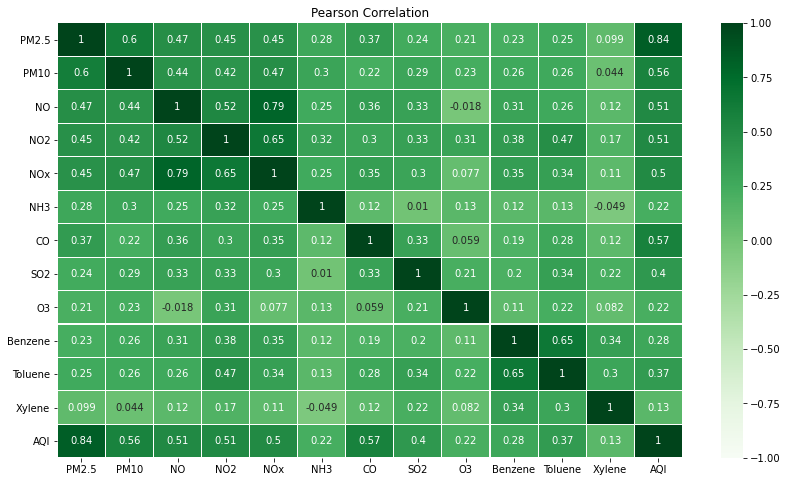

In [24]:
pearsonCorr = data.corr(method='pearson')
spearmanCorr = data.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

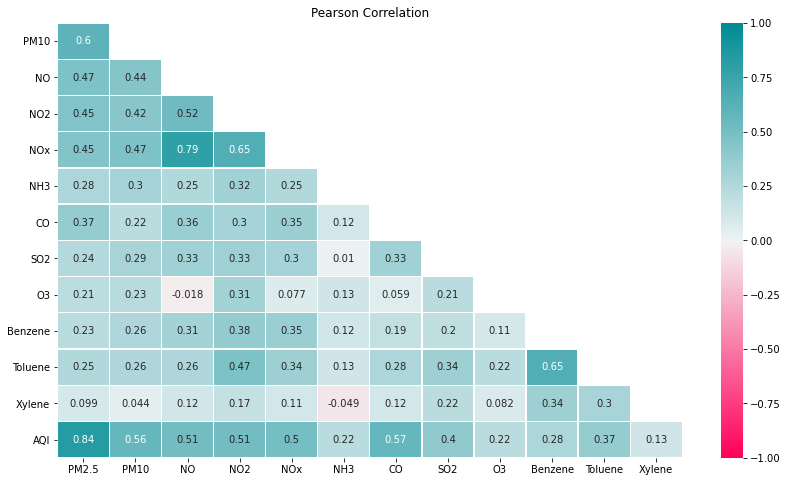

In [25]:
#Create mask for both correlation matrices
#Generating mask for upper triangle

maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

Here NH3,O3,Benzene and Xylene shows low positive correlation

### EDA

<AxesSubplot:title={'center':'air quality index'}, xlabel='AQI_Bucket', ylabel='count'>

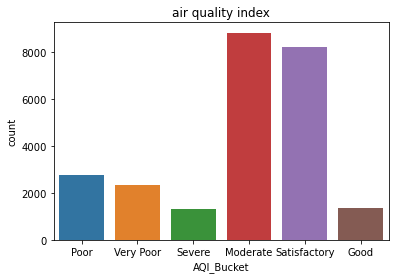

In [26]:
plt.title('air quality index')
sns.countplot(x=data['AQI_Bucket'])

In [27]:
city_day = data.copy()

In [28]:
data['Date'] = pd.to_datetime(data['Date'])


In [29]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1);

In [30]:
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

In [31]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

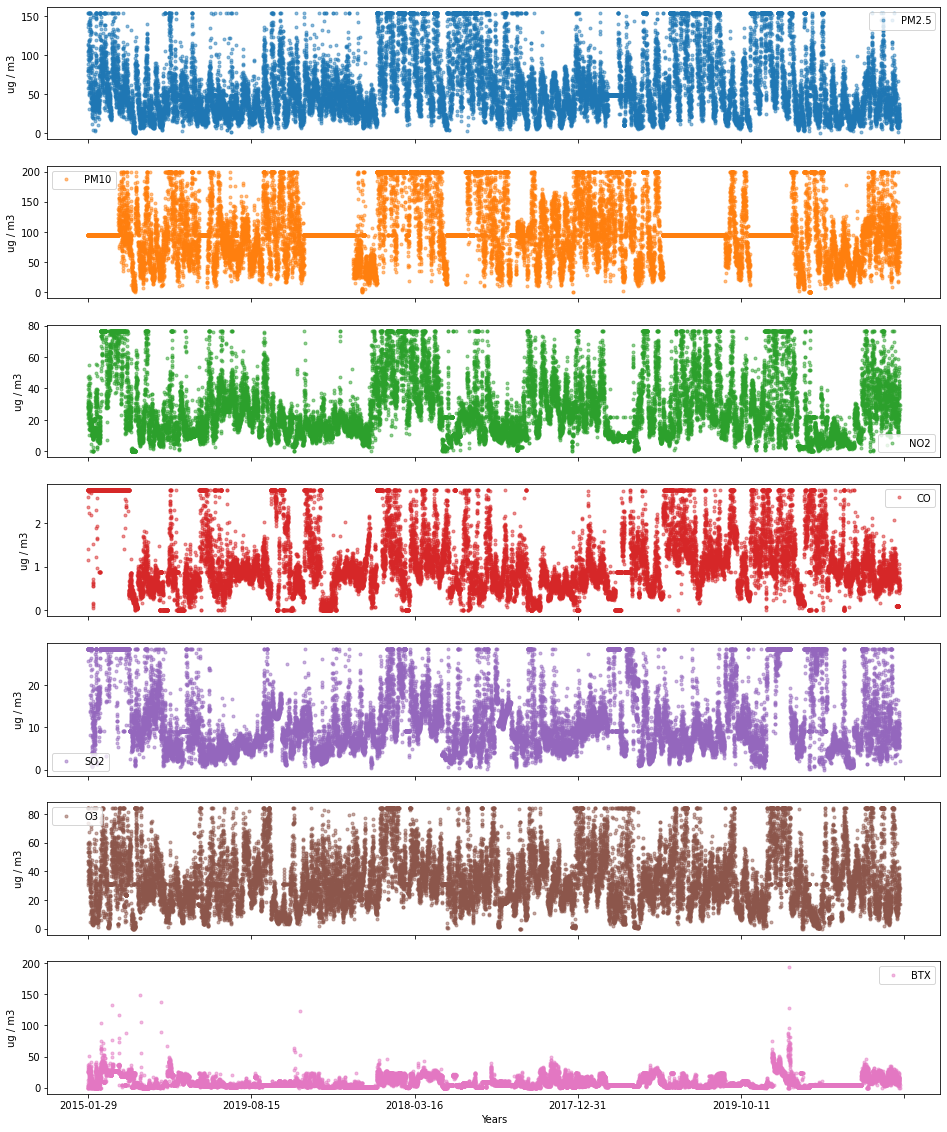

In [32]:
city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

##### univariate

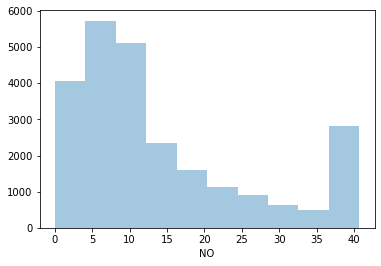

In [33]:
plot1=sns.distplot(data['NO'],kde=False,hist=True,bins=10)

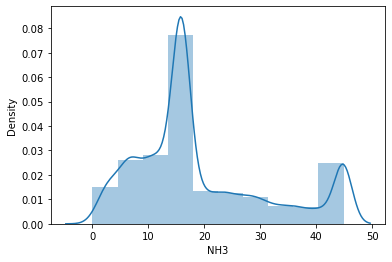

In [34]:
plot1=sns.distplot(data['NH3'],kde=True,hist=True,bins=10)

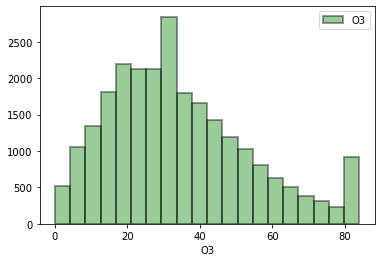

In [35]:
plot1=sns.distplot(data['O3'],kde=False,hist=True,bins=20,hist_kws=dict(edgecolor='k',linewidth='2'),color='Green',label='O3')
plt.legend()

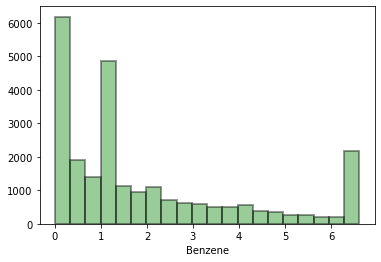

In [36]:
plot1=sns.distplot(data['Benzene'],kde=False,hist=True,bins=20,hist_kws=dict(edgecolor='k',linewidth='2'),color='Green',label='Benzene')


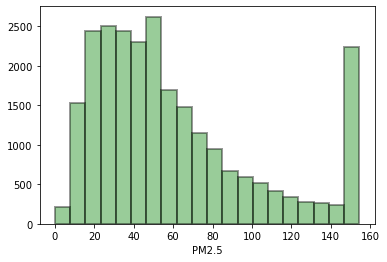

In [37]:
plot1=sns.distplot(data['PM2.5'],kde=False,hist=True,bins=20,hist_kws=dict(edgecolor='k',linewidth='2'),color='Green',label='PM2.5')

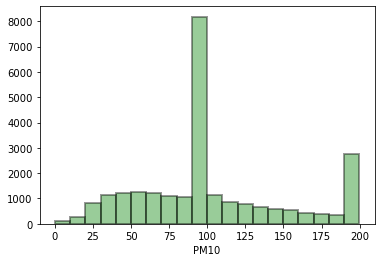

In [38]:
plot1=sns.distplot(data['PM10'],kde=False,hist=True,bins=20,hist_kws=dict(edgecolor='k',linewidth='2'),color='Green',label='PM10')

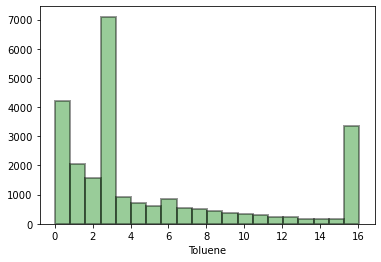

In [39]:
plot1=sns.distplot(data['Toluene'],kde=False,hist=True,bins=20,hist_kws=dict(edgecolor='k',linewidth='2'),color='Green',label='Toluene')

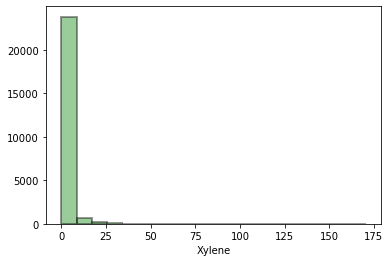

In [40]:
plot1=sns.distplot(data['Xylene'],kde=False,hist=True,bins=20,hist_kws=dict(edgecolor='k',linewidth='2'),color='Green',label='Xylene')


Xylene has very less contribution to Air as it has the lowest AQI whereas PM10 has the highest AQI.

#### bivariate

<AxesSubplot:xlabel='City'>

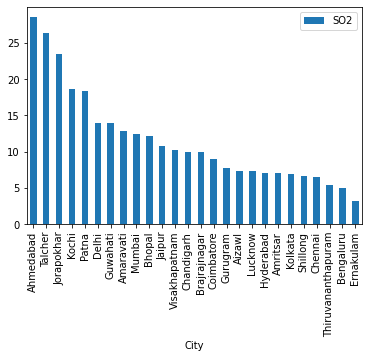

In [41]:
data[['SO2', 'City']].groupby(['City']).median().sort_values("SO2", ascending = False).plot.bar()


SO2 level is highest in Ahmedabad and lowest in Ernakulam.

<AxesSubplot:xlabel='City'>

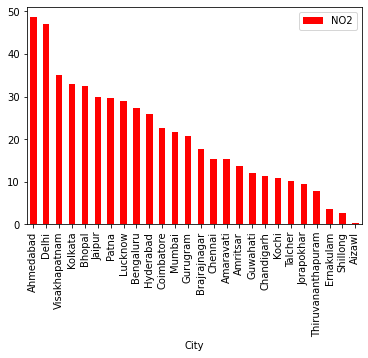

In [42]:
data[['NO2', 'City']].groupby(['City']).median().sort_values("NO2", ascending = False).plot.bar(color = 'r')


Here also NO2 level is higher in Ahmedabad and lowest in Aizawl

<AxesSubplot:xlabel='City'>

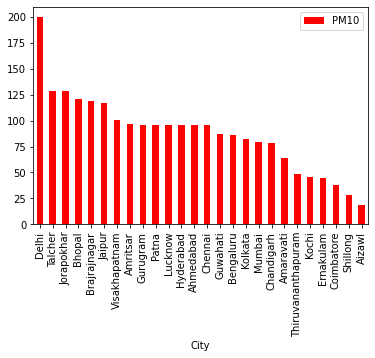

In [43]:
data[['PM10', 'City']].groupby(['City']).median().sort_values("PM10", ascending = False).plot.bar(color = 'r')


<AxesSubplot:xlabel='City'>

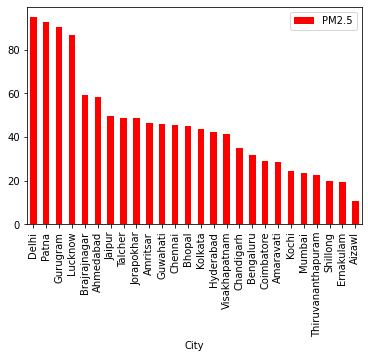

In [44]:
data[['PM2.5', 'City']].groupby(['City']).median().sort_values("PM2.5", ascending = False).plot.bar(color = 'r')


Particulate Matter is higher in Delhi

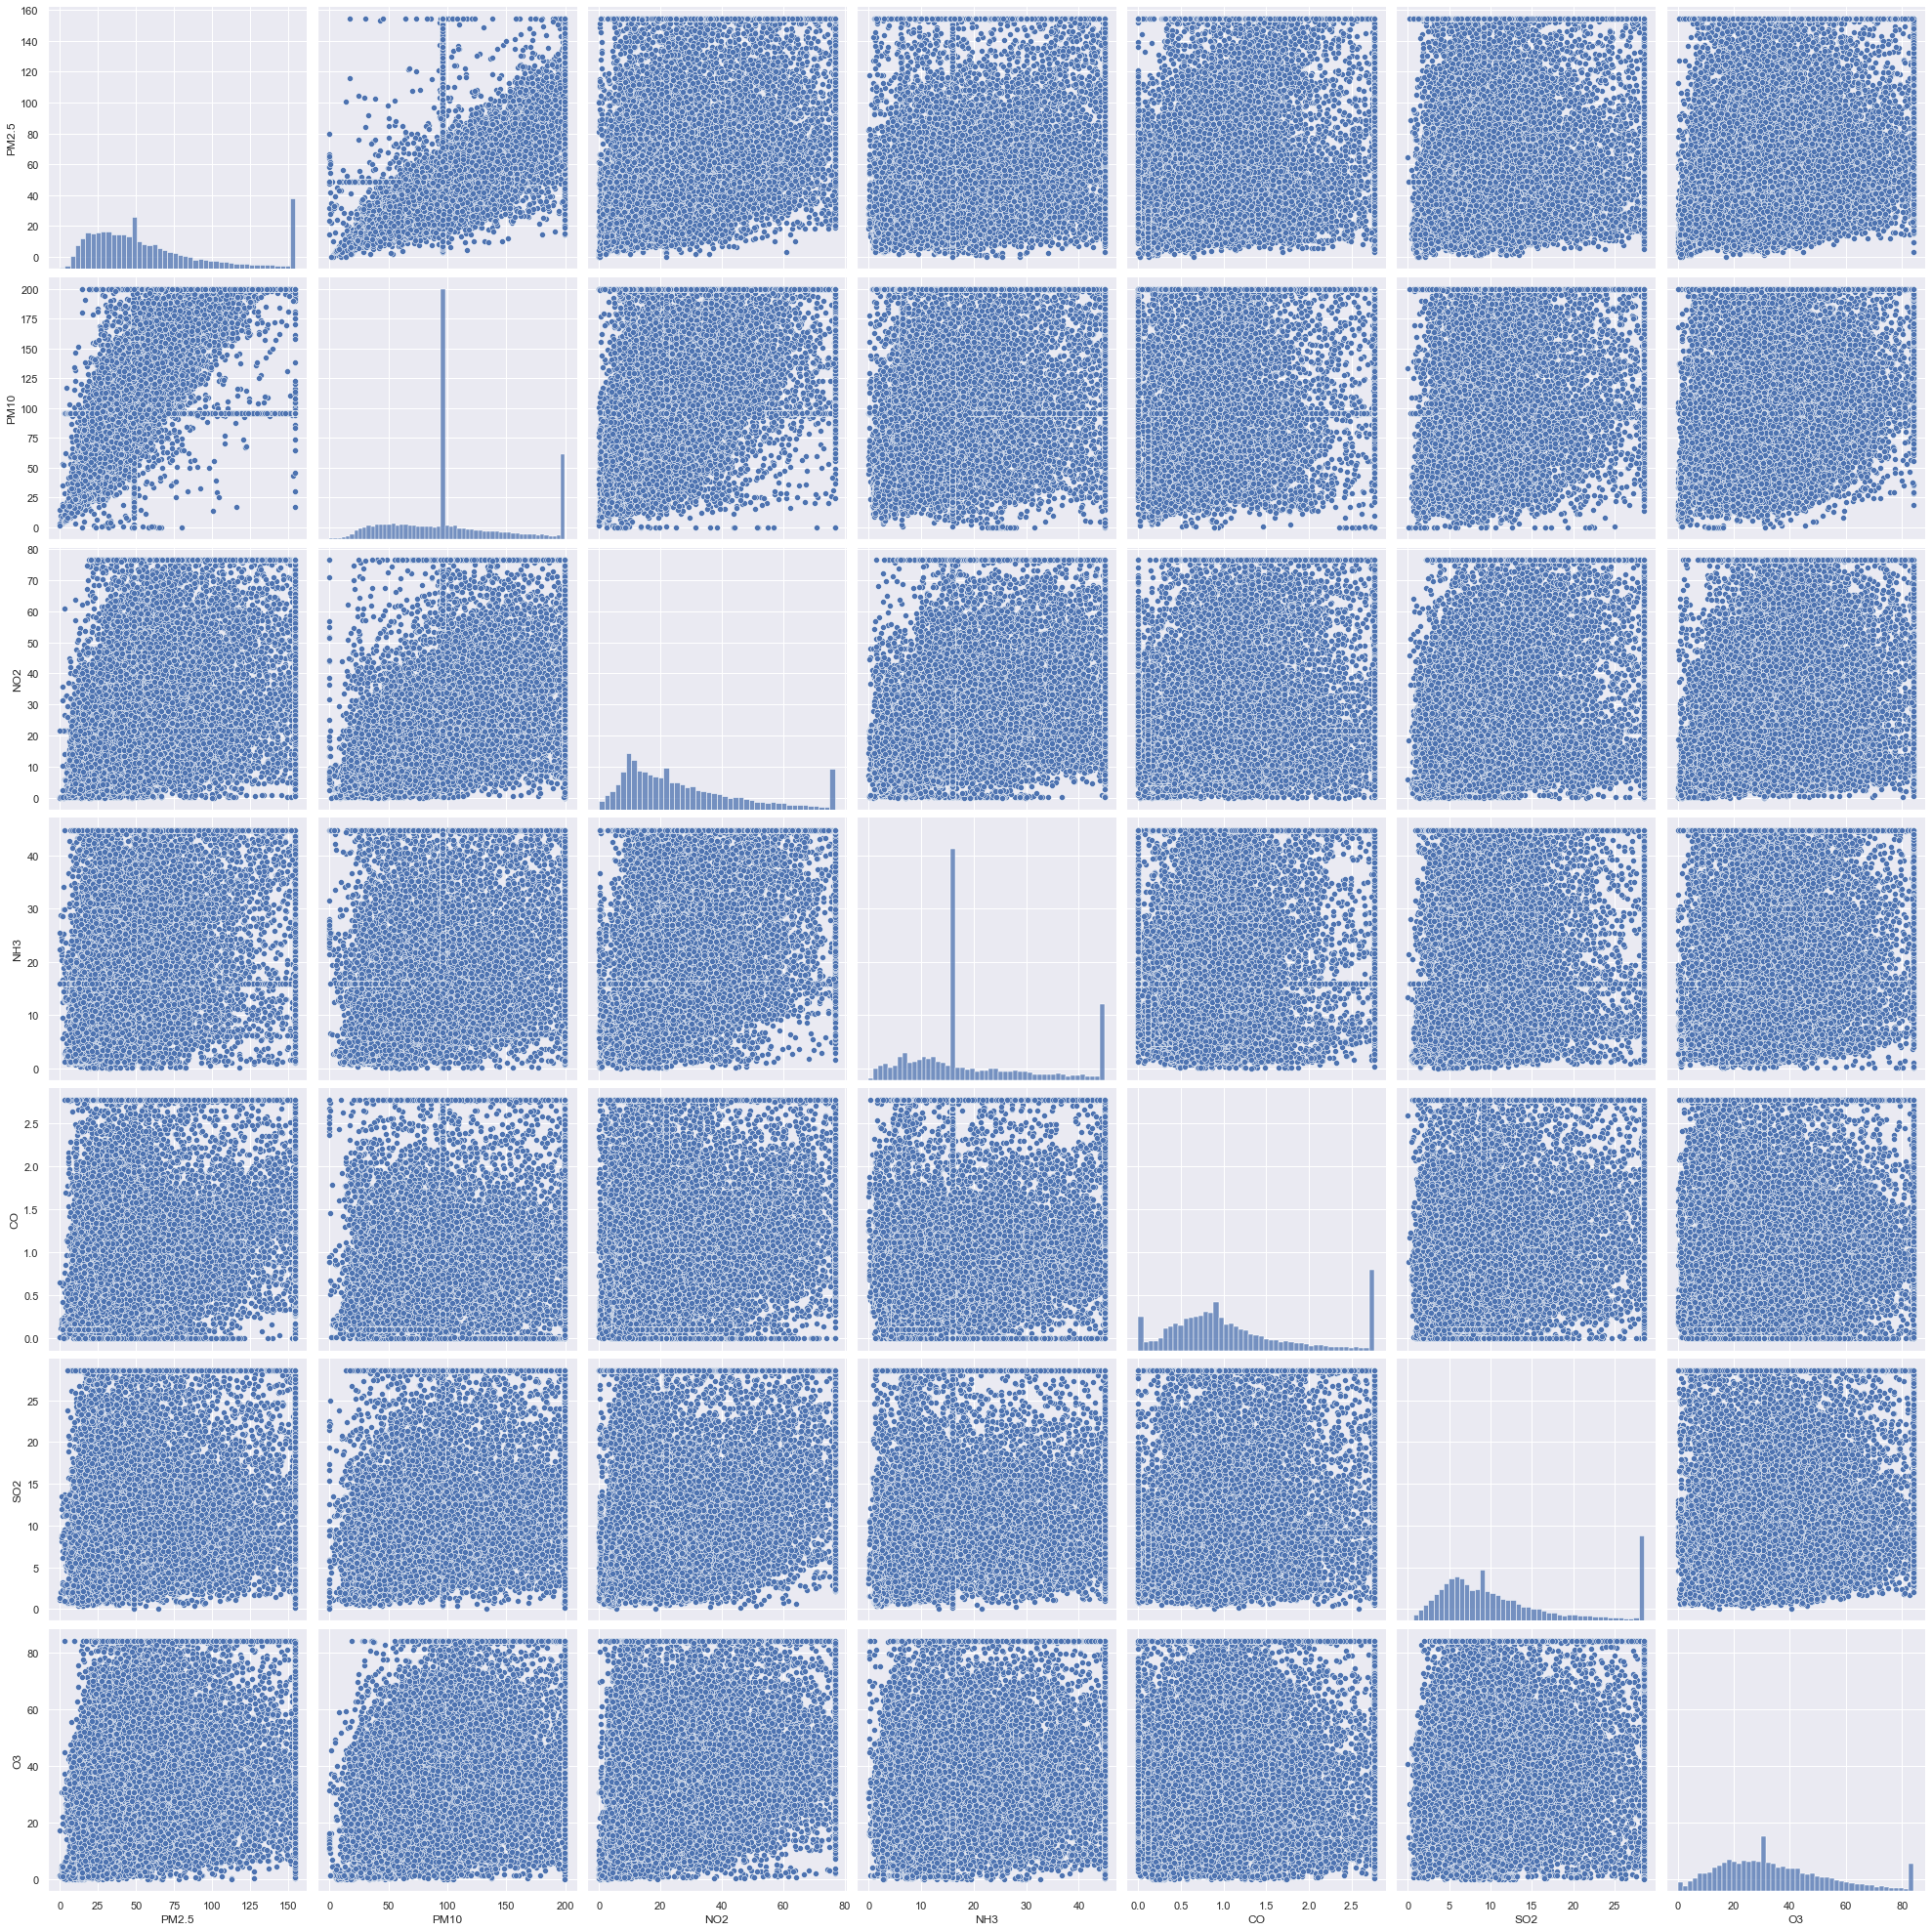

In [45]:
sns.set()
cols = ['PM2.5','PM10','NO2','NH3','CO','SO2','O3']
sns.pairplot(data[cols], size = 4)
plt.show()

In [46]:
data['Date'] = pd.to_datetime(data['Date'], format = '%m/%d/%Y')
data['Year'] = data['Date'].dt.year # year
data['Year'] = data['Year'].fillna(0.0).astype(int)
data = data[(data['Year']>0)]

<AxesSubplot:title={'center':'SO2 by City and Year'}, xlabel='Year', ylabel='City'>

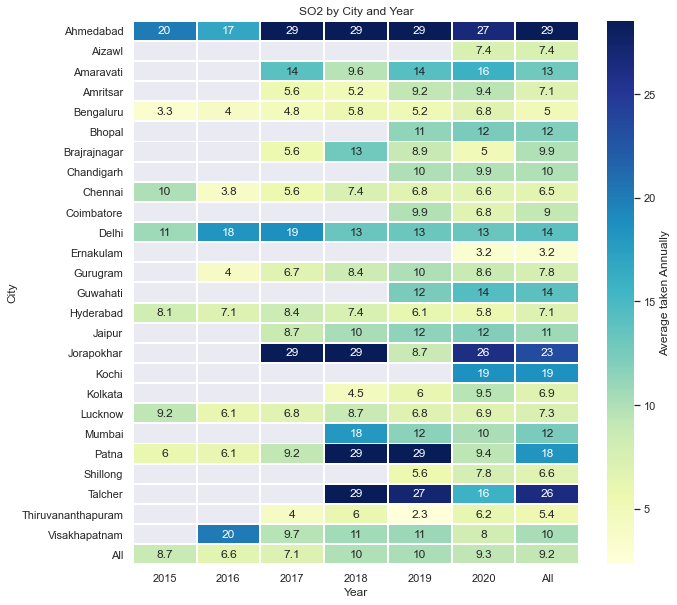

In [47]:
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by City and Year'.format('SO2'))
sns.heatmap(data.pivot_table('SO2', index = 'City',
                columns = ['Year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})


It is evident from the heatmap that the presence of SO2 is high in Ahmedabad since 2019,
Delhi has experienced high level of SO2 in 2016 and 2017 the gradually dicreased,
Jorapokhar,Patna,Talcher witnessed a sudden increase in SO2 2017,2018 and 2019

<AxesSubplot:title={'center':'NO2 by City and Year'}, xlabel='Year', ylabel='City'>

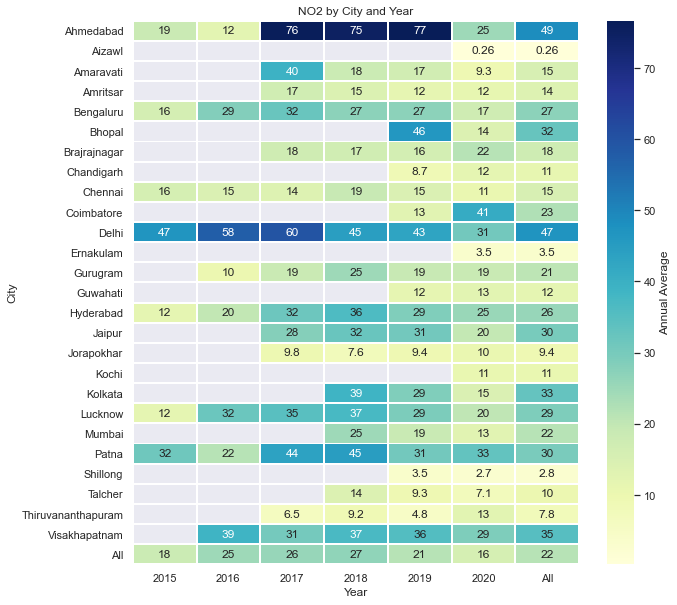

In [48]:
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by City and Year'.format('NO2'))
sns.heatmap(data.pivot_table('NO2', index='City',
                columns = ['Year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

The NO2 concentration has decreased annually in some cities like Ahmedabad, Amaravati,whereas in cities like Bengaluru, Lucknow, it has increased.
In other cities like Delhi,Patna the NO2 concentrations have remained consistently high.

#### c. Encoding

In [49]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data.City=le.fit_transform(data.City)
data.Date=le.fit_transform(data.Date)
data.AQI_Bucket=le.fit_transform(data.AQI_Bucket)

### Modelling

In [50]:
from sklearn.model_selection import train_test_split

predictors = data.drop("AQI_Bucket",axis=1)
target = data["AQI_Bucket"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [51]:
## SVM
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(X_train, Y_train)
Y_pred = svm_linear.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
print("Accuracy is: ", accuracy_score(Y_test,Y_pred))

Accuracy is:  0.9979879275653923


# Hyper Parameter Tuning

In [57]:
param_grid = {'C':[0.1,1,1,100],
              'gamma':[1,0.1,0.01,0.001],
              'kernel':['rbf']}

In [58]:
SVM_Model = SVC(gamma='auto')

In [59]:
#Setting up Random Grid Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV (estimator = SVM_Model,param_distributions = param_grid, cv=3,verbose=2, n_jobs=4)

In [60]:
random_search.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto'), n_jobs=4,
                   param_distributions={'C': [0.1, 1, 1, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [62]:
random_search.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}

In [65]:
random_search.best_estimator_

SVC(C=100, gamma=0.001)

In [68]:
print(f'Accuracy: {random_search.score(X_train,Y_train):.3f}')

Accuracy: 1.000


# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [74]:
print("Accuracy is: ", accuracy_score(Y_test,Y_pred))
print("Precision is: ", precision_score(Y_test,Y_pred,  average = 'micro'))
print("Recall is: ", recall_score(Y_test,Y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(Y_test,Y_pred, average = 'micro'))

Accuracy is:  0.9975855130784709
Precision is:  0.9975855130784709
Recall is:  0.9975855130784709
F1 score is:  0.9975855130784709


# Hyper-Tuning for Random Forest

In [76]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [78]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [80]:
rf_Model = RandomForestClassifier()

# GridSearch CV

In [82]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [85]:
rf_Grid.fit(X_train, Y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [87]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 72}

# Randomized SearchCV

In [89]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [92]:
rf_RandomGrid.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [95]:
rf_RandomGrid.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': False}

In [98]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.940
Test Accuracy - : 0.941


## Although the accuracy score of Random Forest Model(0.94) is lesser than that of SVM (0.98--post tuning 1.0),random forest model may be a better pick as the model will be more general in nature and not prone to OVER FITTING (SVM)


## Conclusion: The majorly affected states in India by air pollution belong to the northern region. Cities like Delhi, Ahmedabad, #Patna are heavily polluted and require immediate action.